In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [26]:
data = pd.read_csv("C:\\Users\\Gobi\\OneDrive\\Documents\\daataset\\GOOGL_2024.csv")

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5118 non-null   object 
 1   Open       5118 non-null   float64
 2   High       5118 non-null   float64
 3   Low        5118 non-null   float64
 4   Close      5118 non-null   float64
 5   Adj Close  5118 non-null   float64
 6   Volume     5118 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 280.0+ KB


In [28]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044
...,...,...,...,...,...,...,...
5113,2024-12-11,185.309998,195.610001,184.850006,195.399994,195.399994,67894100
5114,2024-12-12,195.000000,195.179993,191.710007,191.960007,191.960007,34817500
5115,2024-12-13,191.009995,192.729996,189.639999,189.820007,189.820007,25143500
5116,2024-12-16,192.869995,199.000000,192.619995,196.660004,196.660004,44934900


In [29]:
data['Date'] = pd.to_datetime(data['Date'])  # Convert 'Date' column to datetime
data.set_index('Date', inplace=True)        # Set it as index


In [30]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [31]:
# Data preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Adj Close']])

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Splitting data into input and output
X_rnn, y_rnn = [], []
time_step = 30
for i in range(len(scaled_data) - time_step):
    X_rnn.append(scaled_data[i:(i + time_step), 0])    # here iam taking the past 30 days of data
    y_rnn.append(scaled_data[i + time_step, 0])    # here iam taking a next 30 days for prediction as target value

X_rnn, y_rnn = np.array(X_rnn), np.array(y_rnn)

# Reshape input to be [samples, time steps, features]
X_rnn = np.reshape(X_rnn, (X_rnn.shape[0], X_rnn.shape[1], 1))

# 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)


# Define the model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_rnn.shape[1], 1)),  # First LSTM layer
    LSTM(units=50),  # Second LSTM layer
    Dense(units=1)  # Output layer
])

model.compile(optimizer='rmsprop', loss='mse')


model.fit(X_train, y_train, epochs=50, batch_size=32)

test_loss = model.evaluate(X_test, y_test)
print("Final Test Loss:", test_loss)


Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0081
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.8840e-04
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 6.6891e-04
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.4618e-04
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.9621e-04
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.1585e-04
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.5591e-04
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.9958e-04
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.9349e-04
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.7311e-04
Epoch 11/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.2466e-04
Epoch 12/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.2692e-04
Epoch 13/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 2.6211e-04
Epoch 14/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.

In [34]:
mae = metrics.mean_absolute_error(y_test, model.predict(X_test))
rmse = metrics.root_mean_squared_error(y_test , model.predict(X_test) )
r2 = metrics.r2_score(y_test, model.predict(X_test))


print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Absolute Error (MAE): 0.010871597506497079
Root Mean Squared Error (RMSE): 0.014100657399245573
R² Score: 0.9964368049792962


In [63]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta

data = pd.read_csv("C:\\Users\\Gobi\\OneDrive\\Documents\\daataset\\GOOGL_2024.csv")
# Ensure your Date column is datetime and sorted
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')

# Prepare scaler and scaled data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Adj Close']])

# Last 30 days for LSTM input
time_step = 30
last_30_days = scaled_data[-time_step:].reshape(1, time_step, 1)
future_predictions = []

# Predict next 10 days
for _ in range(10):
    next_day_pred = model.predict(last_30_days, verbose=0)[0, 0]
    future_predictions.append(next_day_pred)
    last_30_days = np.roll(last_30_days, -1)
    last_30_days[0, -1, 0] = next_day_pred

# Inverse scale predictions
future_predictions = np.array(future_predictions)
future_prices = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Generate next 10 valid business days (excluding weekends and holidays)
last_date = data['Date'].iloc[-1]

# Custom holidays (e.g., Dec 21 & 22, 2024)
custom_holidays = pd.to_datetime(['2024-12-21', '2024-12-22'])

# Use pandas to generate business days, then remove custom holidays
future_dates = pd.bdate_range(start=last_date + timedelta(days=1), periods=15)
future_dates = [d for d in future_dates if d not in custom_holidays][:10]

# Print predictions with correct dates
print("LSTM: Next 10 Days Closing Prices")
for i, (date, price) in enumerate(zip(future_dates, future_prices.flatten()), 1):
    print(f"Day {i} ({date.date()}): $ {price:.2f}")


LSTM: Next 10 Days Closing Prices
Day 1 (2024-12-18): $ 197.40
Day 2 (2024-12-19): $ 199.29
Day 3 (2024-12-20): $ 201.02
Day 4 (2024-12-23): $ 202.65
Day 5 (2024-12-24): $ 204.22
Day 6 (2024-12-25): $ 205.75
Day 7 (2024-12-26): $ 207.23
Day 8 (2024-12-27): $ 208.68
Day 9 (2024-12-30): $ 210.10
Day 10 (2024-12-31): $ 211.50


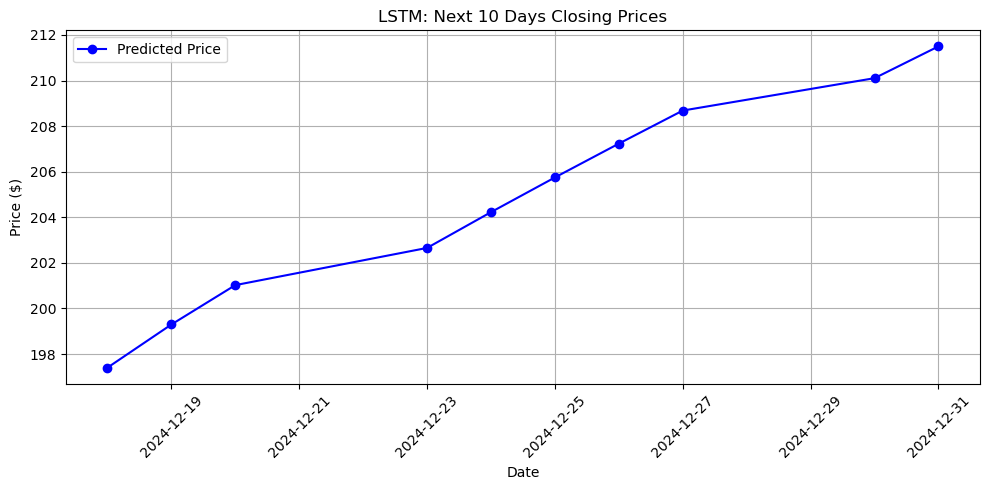

In [37]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(future_dates, future_prices, marker='o', linestyle='-', color='blue', label='Predicted Price')
plt.title('LSTM: Next 10 Days Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 699.0 kB/s eta 0:03:34
   ---------------------------------------- 0.5/150.0 MB 699.0 kB/s eta 0:03:34
   ---------------------------------------- 0.8/150.0 MB 609.6 kB/s eta 0:04:05
   ---------------------------------------- 0.8/150.0 MB 609.6 kB/s eta 0:04:05
   ---------------------------------------- 1.0/150.0 MB 599.0 kB/s eta 0:04:09
   ---------------------------------------- 1.0/150.0 MB 599.0 kB/s eta 0:04:09
   ---------------------------------------- 1.3/150.0 MB 639.0 kB/s eta 0:03:53
   ---------------------------------------- 1.3/150.0 MB 639.0 kB/s eta 0:03:53
   ---------------------------------------- 1.6/150.0 MB 660.3 kB/s eta 0:03

## using Random forest


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import xgboost as xgb


In [38]:

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Adj Close']])


time_step = 30
X_rnn, y_rnn = [], []

for i in range(len(scaled_data) - time_step):
    X_rnn.append(scaled_data[i:i + time_step, 0])     # past 30 days
    y_rnn.append(scaled_data[i + time_step, 0])       # next day

X_rnn = np.array(X_rnn)
y_rnn = np.array(y_rnn)


# Flatten for tree-based models
X_flat = X_rnn.reshape(X_rnn.shape[0], X_rnn.shape[1])  # shape = (samples, time_step)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_flat, y_rnn, test_size=0.2, random_state=42)


In [39]:
# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=109)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results")
print("RMSE :",rmse_rf)
print("MAE  :",mae_rf)
print("R²   :", r2_rf)


Random Forest Results
RMSE : 0.006268398883147465
MAE  : 0.003426474872483621
R²   : 0.9992958355100556


In [61]:
import pandas as pd

# Check if 'Date' column exists in the dataset
if 'Date' not in data.columns:
    print("Error: 'Date' column not found in the dataset.")
else:
    # Convert the 'Date' column to datetime if it's not already
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Check if the 'Date' column is correctly parsed
    if data['Date'].isnull().any():
        print("Warning: There are missing or invalid dates in the 'Date' column.")

    # Get the last date from the dataset
    last_date = data['Date'].iloc[-1]  # Use iloc to safely access the last element

    # Generate the next 10 business days from the last date
    predicted_dates = pd.date_range(last_date, periods=11, freq='B')[1:]  # Skip the first day since it's already the last date

    # Last 30 days for prediction input
    last_30_rf = scaled_data[-30:].reshape(1, 30)
    predicted_scaled_rf = []

    input_seq_rf = last_30_rf.copy()

    # Predict next 10 days
    for _ in range(10):
        next_pred_rf = rf.predict(input_seq_rf)[0]
        predicted_scaled_rf.append(next_pred_rf)
        input_seq_rf = np.append(input_seq_rf[:, 1:], [[next_pred_rf]], axis=1)

    # Inverse scale
    predicted_scaled_rf = np.array(predicted_scaled_rf).reshape(-1, 1)
    predicted_original_rf = scaler.inverse_transform(predicted_scaled_rf)

    # Output with dates and predicted prices
    print("Random Forest: Next 10 Days Closing Prices")
    for i, (date, price) in enumerate(zip(predicted_dates, predicted_original_rf.flatten()), 1):
        print(f"Day {i} ({date.date()}): ${price:.2f}")


Random Forest: Next 10 Days Closing Prices
Day 1 (2024-12-18): $189.63
Day 2 (2024-12-19): $189.02
Day 3 (2024-12-20): $188.94
Day 4 (2024-12-23): $187.82
Day 5 (2024-12-24): $187.36
Day 6 (2024-12-25): $186.46
Day 7 (2024-12-26): $186.73
Day 8 (2024-12-27): $186.63
Day 9 (2024-12-30): $186.26
Day 10 (2024-12-31): $185.97


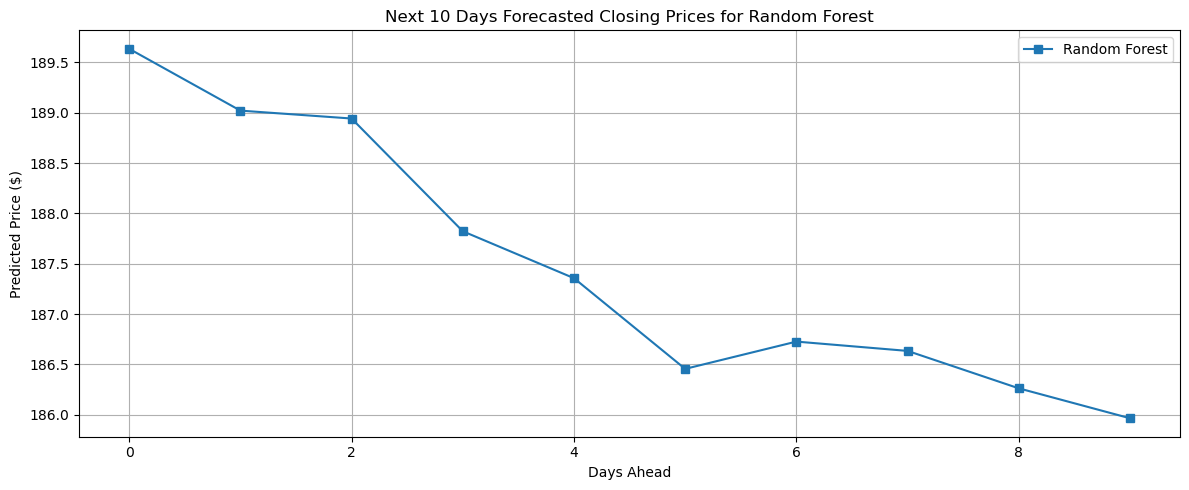

In [41]:
plt.figure(figsize=(12, 5))
plt.plot(predicted_original_rf, label='Random Forest', marker='s')
plt.title("Next 10 Days Forecasted Closing Prices for Random Forest")
plt.xlabel("Days Ahead")
plt.ylabel("Predicted Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Using the XG Boost

In [42]:
# Train XGBoost
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgbr.fit(X_train, y_train)

# Predict
y_pred_xgb = xgbr.predict(X_test)

# Evaluation
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results")
print("RMSE :",rmse_rf)
print("MAE  :",mae_rf)
print("R²   :", r2_rf)


XGBoost Results
RMSE : 0.006268398883147465
MAE  : 0.003426474872483621
R²   : 0.9992958355100556


In [59]:
import pandas as pd
from datetime import timedelta

# Get the last date from your original dataset
last_date = pd.to_datetime(data['Date'].iloc[-1])  # Adjust if 'Date' is not your column name

# Generate next 10 business days excluding 21st and 22nd December
future_dates_xgb = []
current_date = last_date

while len(future_dates_xgb) < 10:
    current_date += timedelta(days=1)
    if current_date.weekday() < 5:  # Monday=0, Sunday=6
        if not (current_date.day in [21, 22] and current_date.month == 12):
            future_dates_xgb.append(current_date)

# Prepare input
last_30_xgb = scaled_data[-30:].reshape(1, 30)
predicted_scaled_xgb = []

input_seq_xgb = last_30_xgb.copy()

# Predict next 10 days
for _ in range(10):
    next_pred_xgb = xgbr.predict(input_seq_xgb)[0]
    predicted_scaled_xgb.append(next_pred_xgb)
    input_seq_xgb = np.append(input_seq_xgb[:, 1:], [[next_pred_xgb]], axis=1)

# Inverse scale
predicted_scaled_xgb = np.array(predicted_scaled_xgb).reshape(-1, 1)
predicted_original_xgb = scaler.inverse_transform(predicted_scaled_xgb)

# Output with dates
print("XGBoost: Next 10 Days Closing Prices")
for i, (date, price) in enumerate(zip(future_dates_xgb, predicted_original_xgb.flatten()), 1):
    print(f"Day {i} ({date.strftime('%Y-%m-%d')}): $ {price:.2f}")


XGBoost: Next 10 Days Closing Prices
Day 1 (2024-12-18): $ 188.28
Day 2 (2024-12-19): $ 187.85
Day 3 (2024-12-20): $ 183.91
Day 4 (2024-12-23): $ 178.42
Day 5 (2024-12-24): $ 173.86
Day 6 (2024-12-25): $ 175.10
Day 7 (2024-12-26): $ 176.64
Day 8 (2024-12-27): $ 178.62
Day 9 (2024-12-30): $ 175.55
Day 10 (2024-12-31): $ 172.71


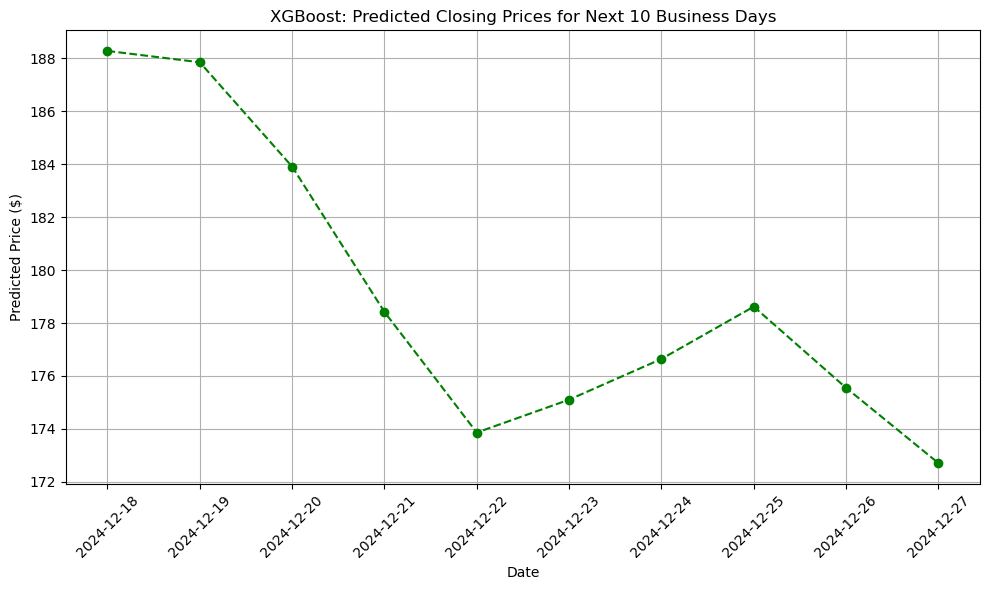

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
#from pandas.tseries.offsets import BDay

# Generate the next 10 business days (excluding weekends)
last_date = pd.to_datetime(data['Date'].iloc[-1])  # Use the last date from your dataset
future_dates_xgb = pd.date_range(start=last_date + BDay(1), periods=10)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(future_dates_xgb, predicted_original_xgb.flatten(), marker='o', linestyle='--', color='green')
plt.title("XGBoost: Predicted Closing Prices for Next 10 Business Days")
plt.xlabel("Date")
plt.ylabel("Predicted Price ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


 ## Using SVR

In [45]:

from sklearn.svm import SVR


svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)
svr.fit(X_train, y_train)


y_pred_svr_scaled = svr.predict(X_test)
y_pred_svr = scaler.inverse_transform(y_pred_svr_scaled.reshape(-1, 1))
y_true_svr = scaler.inverse_transform(y_test.reshape(-1, 1))



rmse_svr = np.sqrt(mean_squared_error(y_true_svr, y_pred_svr))
mae_svr = mean_absolute_error(y_true_svr, y_pred_svr)
r2_svr = r2_score(y_true_svr, y_pred_svr)

print("SVR Performance:")
print(f"RMSE: {rmse_svr:.2f}")
print(f"MAE : {mae_svr:.2f}")
print(f"R²  : {r2_svr:.4f}")

SVR Performance:
RMSE: 1.29
MAE : 0.87
R²  : 0.9992


In [53]:
import pandas as pd
from datetime import timedelta

# Get the last date from your original dataset
last_date = pd.to_datetime(data['Date'].iloc[-1])  # Adjust column name if needed

# Generate next 10 business days excluding 21st and 22nd December
future_dates_svr = []
current_date = last_date

while len(future_dates_svr) < 10:
    current_date += timedelta(days=1)
    if current_date.weekday() < 5:  # Monday=0, Sunday=6
        if not (current_date.day in [21, 22] and current_date.month == 12):
            future_dates_svr.append(current_date)

# Prepare input
last_30_svr = scaled_data[-30:].reshape(1, 30)
predicted_scaled_svr = []

input_seq_svr = last_30_svr.copy()

# Predict next 10 days
for _ in range(10):
    next_pred_svr = svr.predict(input_seq_svr)[0]
    predicted_scaled_svr.append(next_pred_svr)
    input_seq_svr = np.append(input_seq_svr[:, 1:], [[next_pred_svr]], axis=1)

# Inverse scale
predicted_scaled_svr = np.array(predicted_scaled_svr).reshape(-1, 1)
predicted_original_svr = scaler.inverse_transform(predicted_scaled_svr)

# Output with dates
print("SVR: Next 10 Days Closing Prices")
for i, (date, price) in enumerate(zip(future_dates_svr, predicted_original_svr.flatten()), 1):
    print(f"Day {i} ({date.strftime('%Y-%m-%d')}): ${price:.2f}")


SVR: Next 10 Days Closing Prices
Day 1 (2024-12-18): $193.73
Day 2 (2024-12-19): $193.31
Day 3 (2024-12-20): $193.69
Day 4 (2024-12-23): $191.12
Day 5 (2024-12-24): $185.12
Day 6 (2024-12-25): $180.63
Day 7 (2024-12-26): $177.14
Day 8 (2024-12-27): $174.92
Day 9 (2024-12-30): $171.95
Day 10 (2024-12-31): $167.83


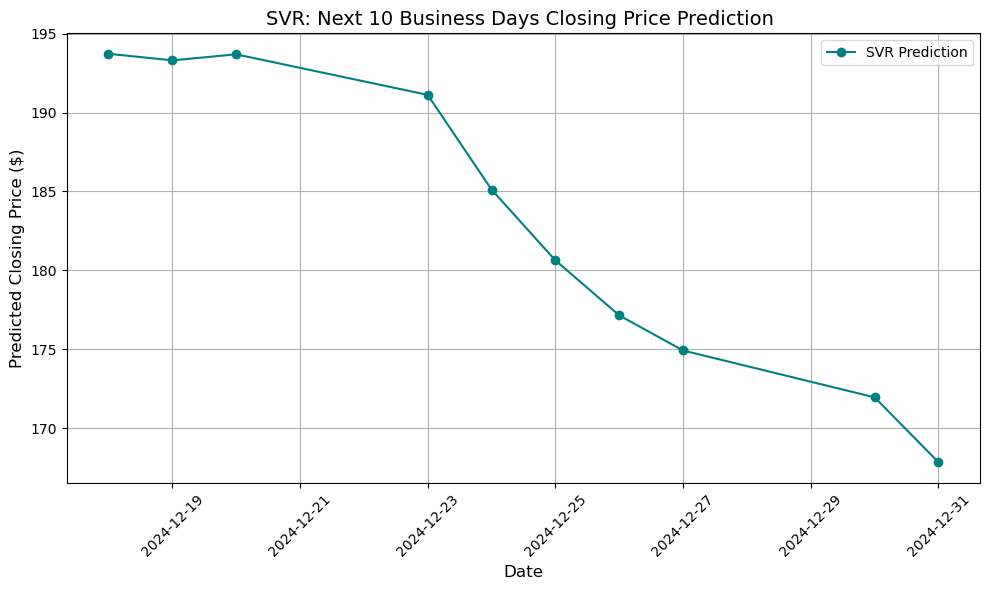

In [56]:
import matplotlib.pyplot as plt

# Ensure future_dates_svr and predicted_original_svr are already generated (from the code you have above)

# Plotting the predicted values
plt.figure(figsize=(10, 6))
plt.plot(future_dates_svr, predicted_original_svr.flatten(), marker='o', linestyle='-', color='teal', label='SVR Prediction')

# Customizing the plot
plt.title("SVR: Next 10 Business Days Closing Price Prediction ", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Predicted Closing Price ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Comparing the 4 model 

In [50]:
 real_adj_close = [190.41,190.22,192.47,193.82,196.88,197.35,195.77,192.74,189.48,189.93]
real_adj_close.reverse()

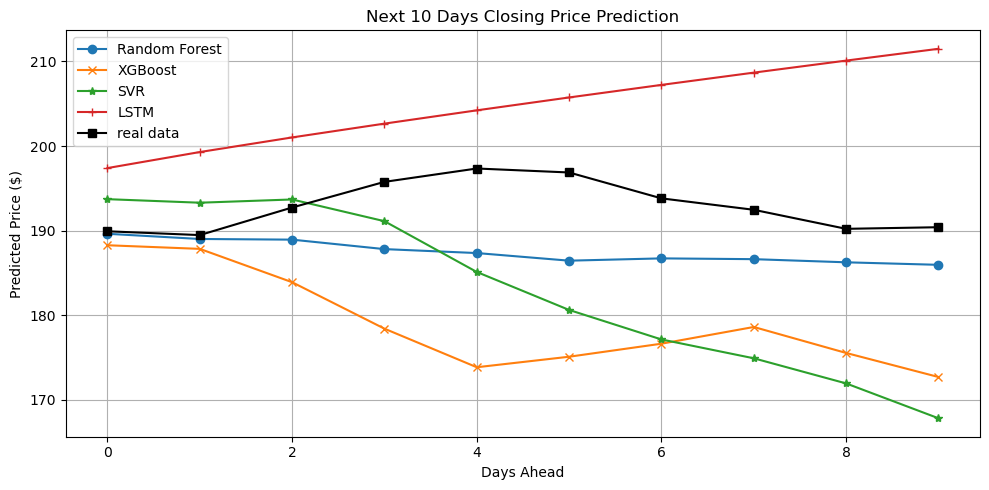

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(predicted_original_rf, label='Random Forest', marker='o')
plt.plot(predicted_original_xgb, label='XGBoost', marker='x')
plt.plot(predicted_original_svr, label='SVR', marker='*')
plt.plot(future_prices, label='LSTM', marker='+')
plt.plot(real_adj_close, color = 'k', label='real data', marker='s')
plt.title("Next 10 Days Closing Price Prediction")
plt.xlabel("Days Ahead")
plt.ylabel("Predicted Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()